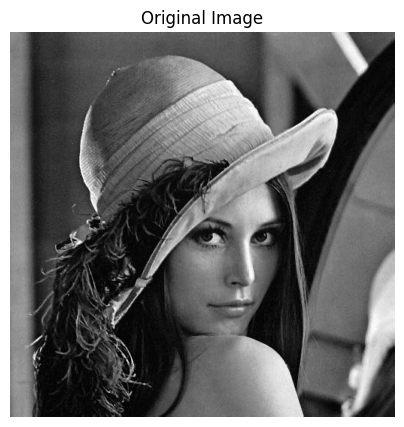

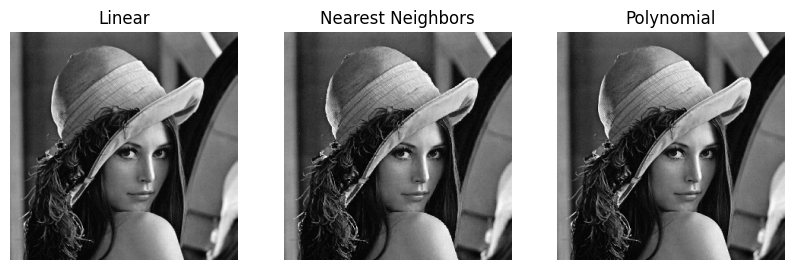

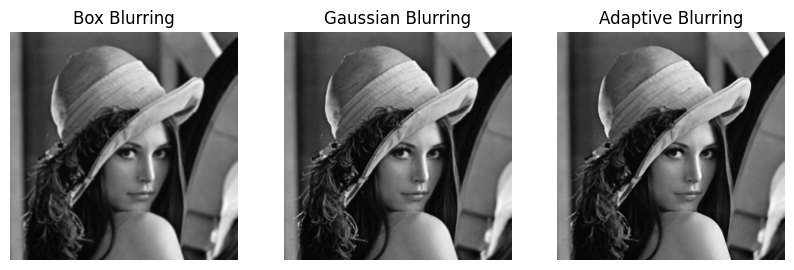

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "/content/sample_data/b&w image.jpg"  # Change this to your image path
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display Original Image
plt.figure(figsize=(5,5))
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.show()

# 1.1 Image Resizing
def resize_image(image, method):
    return cv2.resize(image, (300, 300), interpolation=method)

interpolation_methods = {
    "Linear": cv2.INTER_LINEAR,
    "Nearest Neighbors": cv2.INTER_NEAREST,
    "Polynomial": cv2.INTER_CUBIC
}

plt.figure(figsize=(10,5))
for i, (name, method) in enumerate(interpolation_methods.items()):
    resized = resize_image(image, method)
    plt.subplot(1, 3, i+1)
    plt.imshow(resized)
    plt.title(name)
    plt.axis("off")

plt.show()

# 1.2 Image Blurring
def blur_image(image, method):
    if method == "Box Blurring":
        return cv2.blur(image, (5, 5))
    elif method == "Gaussian Blurring":
        return cv2.GaussianBlur(image, (5, 5), 0)
    elif method == "Adaptive Blurring":
        return cv2.medianBlur(image, 5)

blurring_methods = ["Box Blurring", "Gaussian Blurring", "Adaptive Blurring"]

plt.figure(figsize=(10,5))
for i, method in enumerate(blurring_methods):
    blurred = blur_image(image, method)
    plt.subplot(1, 3, i+1)
    plt.imshow(blurred)
    plt.title(method)
    plt.axis("off")

plt.show()


Training Naive Bayes...

Cross-validation Accuracy for Naive Bayes: 0.5508
Accuracy: 0.5516
Precision: 0.6733
Recall: 0.5415
F1 Score: 0.4964


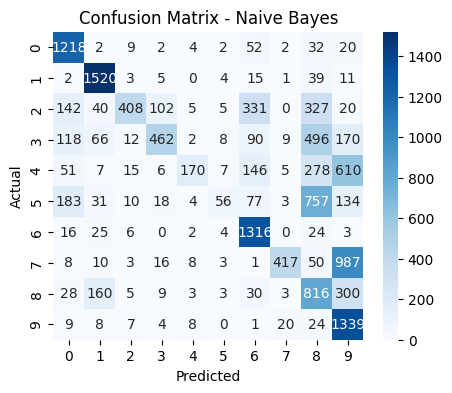

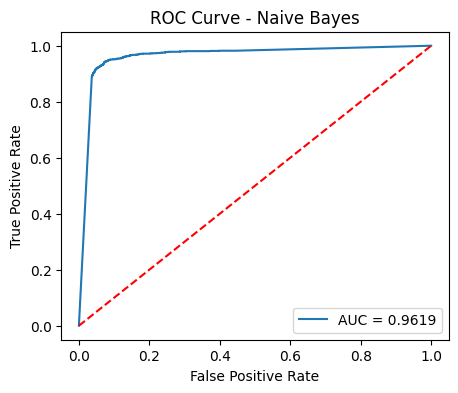

Training Random Forest...

Cross-validation Accuracy for Random Forest: 0.9672
Accuracy: 0.9675
Precision: 0.9673
Recall: 0.9674
F1 Score: 0.9673


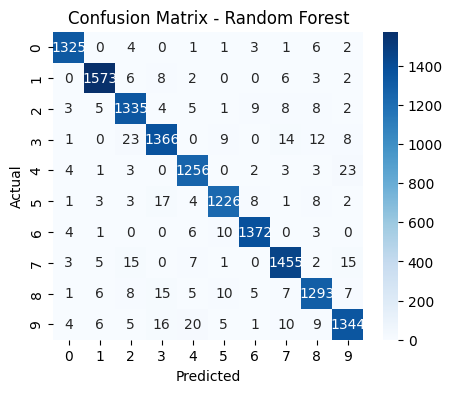

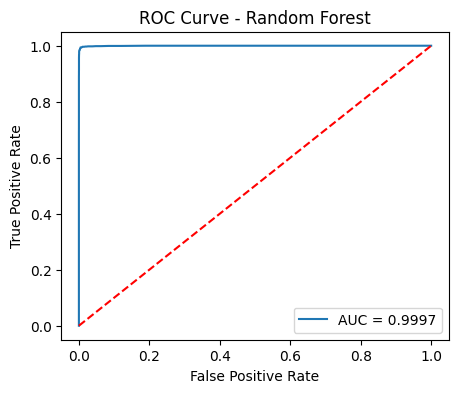

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import fetch_openml
import seaborn as sns

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data / 255.0  # Normalize
y = mnist.target.astype(int)

# Split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose two algorithms
models = {
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"Training {name}...\n")

    # K-Fold Cross Validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
    print(f"Cross-validation Accuracy for {name}: {np.mean(cv_scores):.4f}")

    # Train and Predict
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Plot Confusion Matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC and AUC (For binary classification, we use label '0' vs all)
    y_test_bin = (y_test == 0).astype(int)
    y_pred_prob = model.predict_proba(X_test)[:, 0] if hasattr(model, "predict_proba") else y_pred
    fpr, tpr, _ = roc_curve(y_test_bin, y_pred_prob)
    auc_score = auc(fpr, tpr)

    plt.figure(figsize=(5,4))
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='r')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {name}")
    plt.legend()
    plt.show()

    print("="*50)


Cross-validation Accuracy: 0.8246

Model Performance:
✅ Accuracy: 0.8281
✅ Precision: 0.8344
✅ Recall: 0.8246
✅ F1 Score: 0.8264


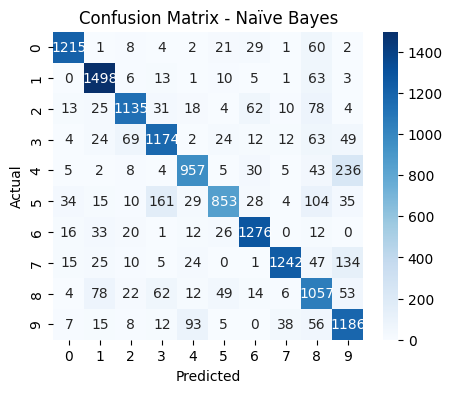

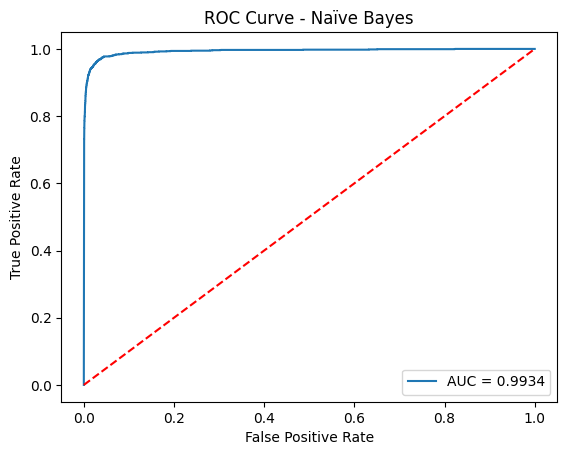

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import fetch_openml

# 📌 Load MNIST dataset & normalize (0-1 range)
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data / 255.0, mnist.target.astype(int)

# 📌 Split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 Train Multinomial Naïve Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# 📌 K-Fold Cross Validation (5-fold)
cv_scores = cross_val_score(nb_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation Accuracy: {np.mean(cv_scores):.4f}")

# 📌 Predict on test data
y_pred = nb_model.predict(X_test)

# 📌 Compute Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"\nModel Performance:")
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")
print(f"✅ F1 Score: {f1:.4f}")

# 📌 Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix - Naïve Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 📌 ROC Curve & AUC (One-vs-All for digit '0')
y_test_bin = (y_test == 0).astype(int)
y_pred_prob = nb_model.predict_proba(X_test)[:, 0]

fpr, tpr, _ = roc_curve(y_test_bin, y_pred_prob)
plt.plot(fpr, tpr, label=f"AUC = {auc(fpr, tpr):.4f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='r')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Naïve Bayes")
plt.legend()
plt.show()
